# Render a Nucleosome Array with PyMOL

Using [`wlcstat`](https://github.com/ajspakow/wlcstat) and linker lengths from our sliding nucleosome model, we generate coordinates for nucleosomes in our array. These coordinates are represented in PDB format so that they can be rendered in PyMOL.

#### Specify Package Root Directory

In [1]:
import os
import sys

# Get the absolute path of the notebook's directory
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Navigate one level up to get the root directory path
root_directory = os.path.abspath(os.path.join(notebook_directory, '..'))

# Change the working directory to the root directory
os.chdir(root_directory)

# Append the root directory to sys.path
sys.path.append(root_directory)

#### Import Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sliding_nucleosome.nucleo_arr as nuc

#### Specify Output File

In [3]:
out_dir = "/scratch/users/jwakim/sliding_nucleosome/output_var_methyl_frac/sim_999"
snap_ind = 99
snap_path = f"{out_dir}/snap_{snap_ind}.json"

#### Load the Snapshot

In [4]:
# Load the nucleosome array snapshots
nuc_arr = nuc.NucleosomeArray.load(snap_path)

#### Generate configuration

Apply [`wlcstat`](https://github.com/ajspakow/wlcstat) chain growth algorithm to generate 3D coordinates for the nucleosome array based on the linker lengths.

In [5]:
# Specify a subset of the chain to render
beads_in_image = 160
ind0 = int(nuc_arr.n_beads / 2 - beads_in_image / 2)
indf = int(nuc_arr.n_beads / 2 + beads_in_image / 2)

# Specify how many configurations to generate
n_configs = 5

# Generate a configuration of the nucleosome array
for i in range(n_configs):
    nuc.render_nuc_arr(nuc_arr, ind0, indf, save_path=f"{out_dir}/r_poly_snap_{snap_ind}_sample_{i}.pdb")

#### Plot a Profile of Linker Lengths

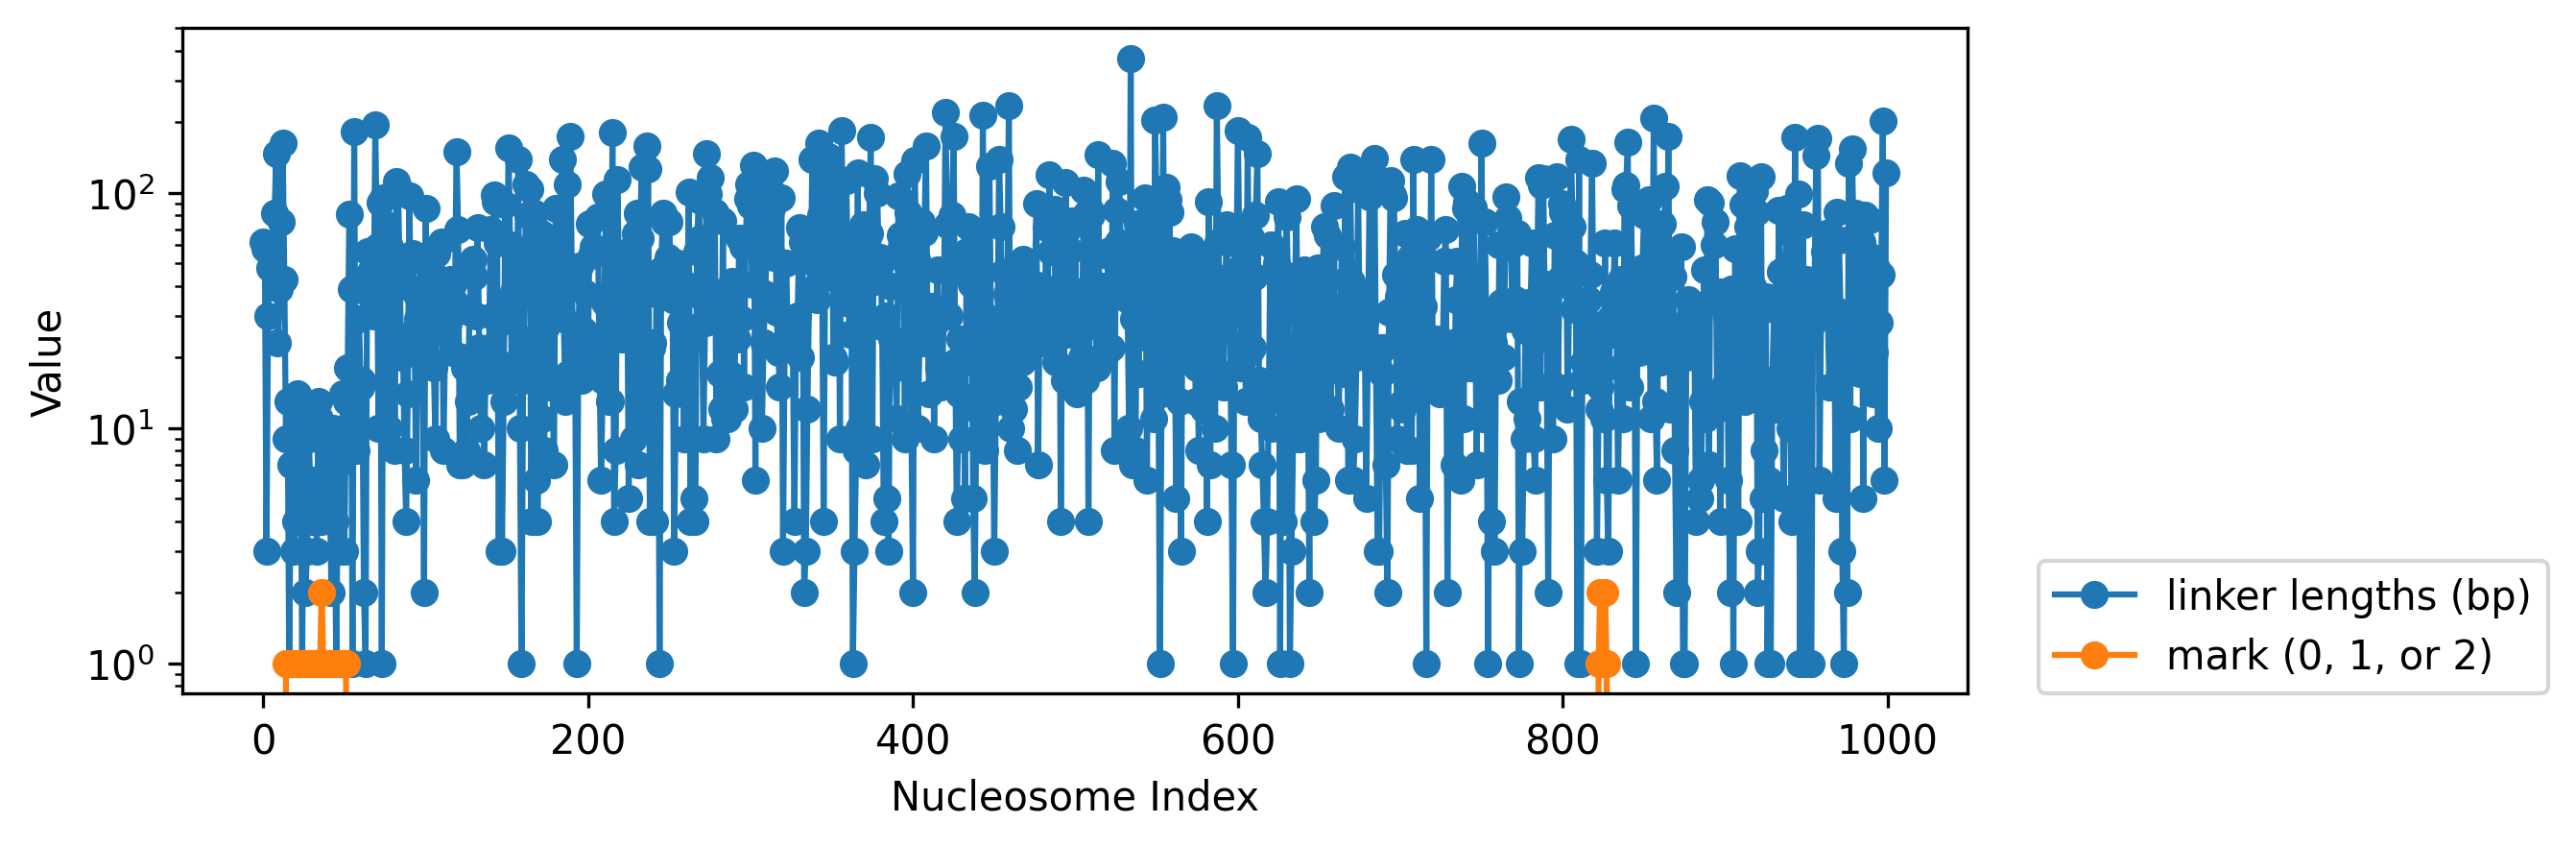

In [6]:
linker_lengths = nuc_arr.linker_lengths
marks = nuc_arr.marks
nucleosome_indices = np.arange(len(linker_lengths))

plt.figure(figsize=(8,3), dpi=300)
plt.plot(nucleosome_indices, linker_lengths, "o-", label="linker lengths (bp)")
plt.plot(nucleosome_indices, marks, "o-", label="mark (0, 1, or 2)")
plt.xlabel("Nucleosome Index")
plt.ylabel("Value")
plt.yscale("log")
plt.legend(loc=(1.04, 0))
plt.show()